In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\flythenest\\python deets\\projects\\ftn\\Blackrock Dataset - Cleaned.csv")

In [3]:

df['Market Value'] = pd.to_numeric(df['Market Value'], errors='coerce')
df['% Ownership'] = pd.to_numeric(df['% Ownership'], errors='coerce')


1. Import the dataset and display its first 10 rows.

In [4]:
df['Change in Shares'] = df['Change in Shares'].str.replace(',', '')
df['Change in Shares'] = pd.to_numeric(df['Change in Shares'], errors='coerce')


In [5]:
df['Source date'] = pd.to_datetime(df['Source Date'])

df['Date Reported'] = pd.to_datetime(df['Date Reported'])



In [6]:
df = df.drop('Source Date', axis=1)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059 entries, 0 to 6058
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Sr.No                         6059 non-null   int64         
 1   Stock                         6059 non-null   object        
 2   Sector                        5736 non-null   object        
 3   Shares Held or Principal Amt  5885 non-null   float64       
 4   Market Value                  5839 non-null   float64       
 5   % of Portfolio                5839 non-null   float64       
 6   Previous % of Portfolio       4423 non-null   float64       
 7   Ranked                        6059 non-null   int64         
 8   Change in Shares              5739 non-null   float64       
 9   % Change                      4534 non-null   float64       
 10  % Ownership                   4920 non-null   float64       
 11  Qtr 1st Owned                 

In [3]:
print(df.head(10))

   Sr.No  Stock                  Sector  Shares Held or Principal Amt  \
0      0   AAPL  INFORMATION TECHNOLOGY                  1.027633e+09   
1      1   MSFT  INFORMATION TECHNOLOGY                  5.237499e+08   
2      2   AMZN  CONSUMER DISCRETIONARY                  5.828776e+08   
3      3     BP                  ENERGY                  1.950623e+09   
4      4   TSLA  CONSUMER DISCRETIONARY                  5.524145e+07   
5      5  GOOGL          COMMUNICATIONS                  2.070243e+07   
6      6   GOOG          COMMUNICATIONS                  1.901629e+07   
7      7   NVDA  INFORMATION TECHNOLOGY                  1.808817e+08   
8      8  BRK.B                 FINANCE                  1.023058e+08   
9      9    JNJ             HEALTH CARE                  2.007992e+08   

   Market Value  % of Portfolio  Previous % of Portfolio  Ranked  \
0  1.794350e+11            4.74                     4.61       1   
1  1.614770e+11            4.26                     4.44    

2 Check for missing values in all columns.

In [4]:
df.isnull().sum() #we have a huge null value in this but we cant remove it of it will cause the data loss leading to the important column

Sr.No                              0
Stock                              0
Sector                           323
Shares Held or Principal Amt     174
Market Value                     220
% of Portfolio                   220
Previous % of Portfolio         1636
Ranked                             0
Change in Shares                   0
% Change                        1525
% Ownership                     1139
Qtr 1st Owned                      0
Estimated Avg Price Paid         766
Quarter End Price                808
Recent Price                     416
Source                             0
Source Date                        0
Date Reported                      0
dtype: int64

3 Determine unique sectors in the dataset.

In [8]:
list(df['Sector'].unique())

['INFORMATION TECHNOLOGY',
 'CONSUMER DISCRETIONARY',
 'ENERGY',
 'COMMUNICATIONS',
 'FINANCE',
 'HEALTH CARE',
 'CONSUMER STAPLES',
 'UTILITIES AND TELECOMMUNICATIONS',
 'TRANSPORTS',
 'REAL ESTATE',
 'INDUSTRIALS',
 'MATERIALS',
 nan]

 4. Calculate basic statistics (mean, median, mode) for "Market Value."

In [10]:
df['Market Value'].describe()


count    5.839000e+03
mean     6.953845e+08
std      4.887076e+09
min      1.000000e+03
25%      1.980500e+06
50%      3.120700e+07
75%      2.719285e+08
max      1.794350e+11
Name: Market Value, dtype: float64

5. Plot a histogram of "% Ownership.

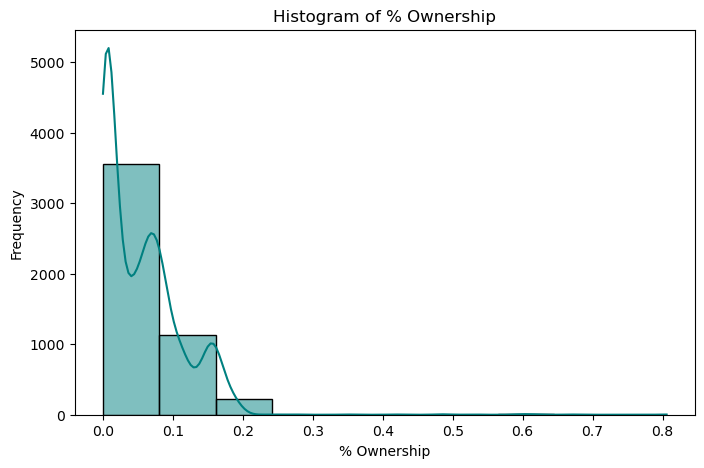

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['% Ownership'], bins=10, kde=True, color='teal')
plt.title('Histogram of % Ownership')
plt.xlabel('% Ownership')
plt.ylabel('Frequency')
plt.show()

6. Filter rows where "% Change" is greater than 5%.

In [13]:
filtered_df=df[df['% Change'] >5]
print(filtered_df.head(10))

     Sr.No      Stock          Sector  Shares Held or Principal Amt  \
3        3         BP          ENERGY                  1.950623e+09   
63      63        AZN     HEALTH CARE                  1.573913e+08   
94      94        PUK         FINANCE                  2.789303e+08   
214    214   SPY(PUT)         FINANCE                  7.375800e+06   
230    230        ABB     INDUSTRIALS                  1.015212e+08   
241    241        WBD  COMMUNICATIONS                  1.673227e+08   
569    569   LQD(PUT)         FINANCE                  9.101400e+06   
620    620   QQQ(PUT)         FINANCE                  2.675700e+06   
792    792   IWM(PUT)         FINANCE                  3.280900e+06   
949    949  QQQ(CALL)         FINANCE                  1.466600e+06   

     Market Value  % of Portfolio  Previous % of Portfolio  Ranked  \
3    6.314166e+10            1.67                     0.01       4   
63   1.039884e+10            0.27                     0.01      62   
94   7.0

7. Create a new column calculating the difference between "Recent Price" and "Quarter End Price."

In [38]:
df['diffrence']=df['Quarter End Price']-df['Recent Price']
df['diffrence'].head(10)

0     28.26
1     39.91
2     46.67
3       NaN
4    343.97
5    405.69
6    406.87
7    114.28
8     73.63
9     -1.27
Name: diffrence, dtype: float64

8. Sort data by "Rank" in ascending order.

In [42]:
df_shorted=df.sort_values(by='Ranked', ascending=True)
df_shorted.head(5)

,Sr.No,Stock,Sector,Shares Held or Principal Amt,Market Value,% of Portfolio,Previous % of Portfolio,Ranked,Change in Shares,% Change,% Ownership,Qtr 1st Owned,Estimated Avg Price Paid,Quarter End Price,Recent Price,Source,Date Reported,Source date,diffrence
0,0,AAPL,INFORMATION TECHNOLOGY,1.027633e+09,1.794350e+11,4.74,4.61,1,7.822596e+06,NaN,0.0635,Q3 2007,36.74,174.61,146.35,13F,2022-05-12,2022-03-31,28.26
25,25,AAPL,INFORMATION TECHNOLOGY,1.027633e+09,1.794350e+11,4.74,4.61,1,7.822596e+06,NaN,0.0635,Q3 2007,36.74,174.61,146.35,13F,2022-06-06,2022-04-25,28.26
1,1,MSFT,INFORMATION TECHNOLOGY,5.237499e+08,1.614770e+11,4.26,4.44,2,4.714236e+06,NaN,0.0700,Q3 2007,79.69,308.31,268.40,13F,2022-05-13,2022-04-01,39.91
2,2,AMZN,CONSUMER DISCRETIONARY,5.828776e+08,9.500760e+10,2.51,2.44,3,8.521600e+06,0.01,0.0029,Q4 2008,1126.05,163.00,116.33,13F,2022-05-14,2022-04-02,46.67
3,3,BP,ENERGY,1.950623e+09,6.314166e+10,1.67,0.01,4,1.938847e+09,164.64,0.6064,-,NaN,NaN,27.78,13G,2022-05-15,2022-04-03,NaN


9. Group data by sector and calculate the total market value per sector.

In [43]:
sector_value=df.groupby('Sector')['Market Value'].sum().reset_index()
sector_value.head(10)

,Sector,Market Value
0,COMMUNICATIONS,2.606151e+11
1,CONSUMER DISCRETIONARY,4.166302e+11
2,CONSUMER STAPLES,2.242599e+11
3,ENERGY,2.135274e+11
4,FINANCE,6.142544e+11
5,HEALTH CARE,5.020981e+11
6,INDUSTRIALS,2.560601e+11
7,INFORMATION TECHNOLOGY,1.070440e+12
8,MATERIALS,1.219862e+11
9,REAL ESTATE,1.420035e+11


10. Replace missing values in numeric columns with their column mean.

In [46]:
float_columns = df.select_dtypes(include=['float64'])
df[float_columns.columns] = float_columns.fillna(float_columns.mean())
df.head()

,Sr.No,Stock,Sector,Shares Held or Principal Amt,Market Value,% of Portfolio,Previous % of Portfolio,Ranked,Change in Shares,% Change,% Ownership,Qtr 1st Owned,Estimated Avg Price Paid,Quarter End Price,Recent Price,Source,Date Reported,Source date,diffrence
0,0,AAPL,INFORMATION TECHNOLOGY,1.027633e+09,1.794350e+11,4.74,4.61,1,7.822596e+06,10.822704,0.0635,Q3 2007,36.740000,174.610000,146.35,13F,2022-05-12,2022-03-31,28.26000
1,1,MSFT,INFORMATION TECHNOLOGY,5.237499e+08,1.614770e+11,4.26,4.44,2,4.714236e+06,10.822704,0.0700,Q3 2007,79.690000,308.310000,268.40,13F,2022-05-13,2022-04-01,39.91000
2,2,AMZN,CONSUMER DISCRETIONARY,5.828776e+08,9.500760e+10,2.51,2.44,3,8.521600e+06,0.010000,0.0029,Q4 2008,1126.050000,163.000000,116.33,13F,2022-05-14,2022-04-02,46.67000
3,3,BP,ENERGY,1.950623e+09,6.314166e+10,1.67,0.01,4,1.938847e+09,164.640000,0.6064,-,2205.948315,158.376698,27.78,13G,2022-05-15,2022-04-03,31.40603
4,4,TSLA,CONSUMER DISCRETIONARY,5.524145e+07,5.952819e+10,1.57,1.42,5,2.396458e+06,0.040000,0.0533,Q3 2010,288.020000,1077.600000,733.63,13F,2022-05-16,2022-04-04,343.97000


11. Create a bar chart showing market value distribution across sectors.

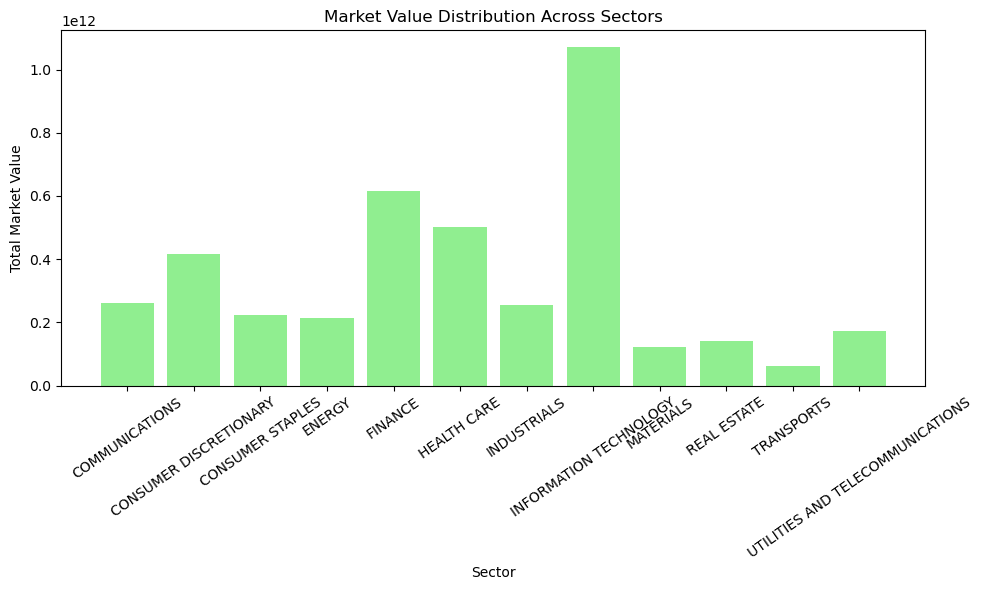

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(sector_value['Sector'],sector_value['Market Value'], color='lightgreen')
plt.title('Market Value Distribution Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Total Market Value')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


12. Plot a line graph comparing "Estimated Avg Price Paid" to "Quarter End Price."

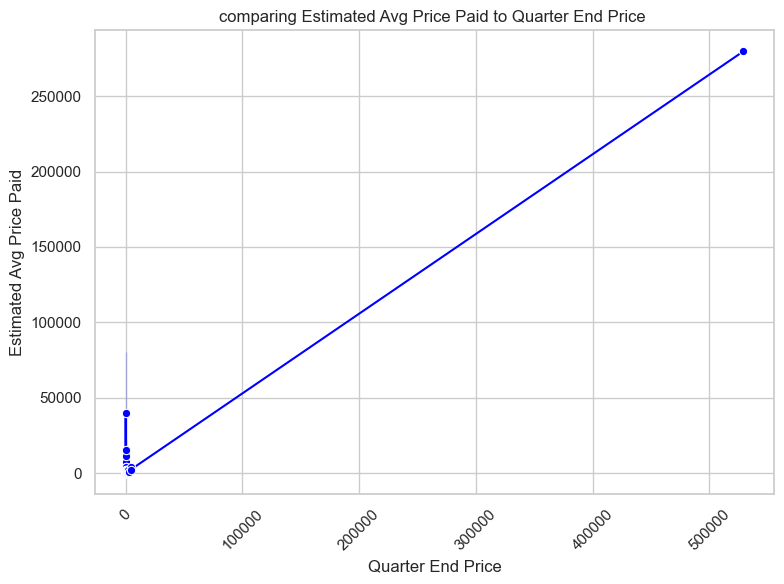

In [86]:
#remove ouliear which spikes one point making irrelevant
filtered_df = df[(df['Estimated Avg Price Paid'] < 100000) & (df['Quarter End Price'] < 100000)]
#unfiltered data with sns
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Quarter End Price', y='Estimated Avg Price Paid', marker='o', color='blue')
plt.title('comparing Estimated Avg Price Paid to Quarter End Price ')
plt.xlabel('Quarter End Price')
plt.ylabel('Estimated Avg Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid('True')
plt.show()

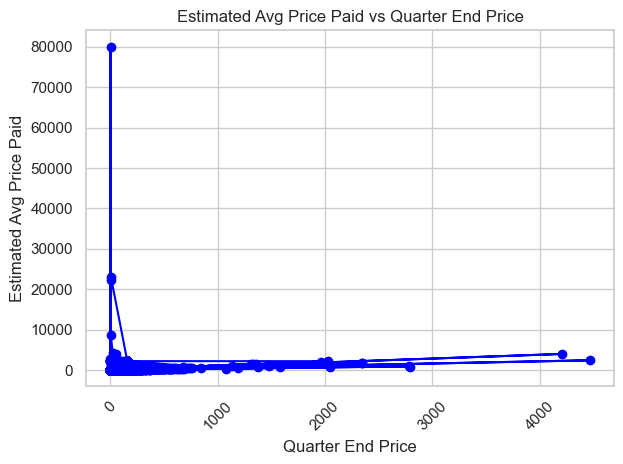

In [87]:
#filtered with plt
sns.set(style="whitegrid")
plt.plot(filtered_df['Quarter End Price'],filtered_df['Estimated Avg Price Paid'],color='blue',marker='o')

plt.title('Estimated Avg Price Paid vs Quarter End Price')
plt.xlabel('Quarter End Price')
plt.ylabel('Estimated Avg Price Paid')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


13. Generate a scatter plot of "% of Portfolio" vs "% Ownership."

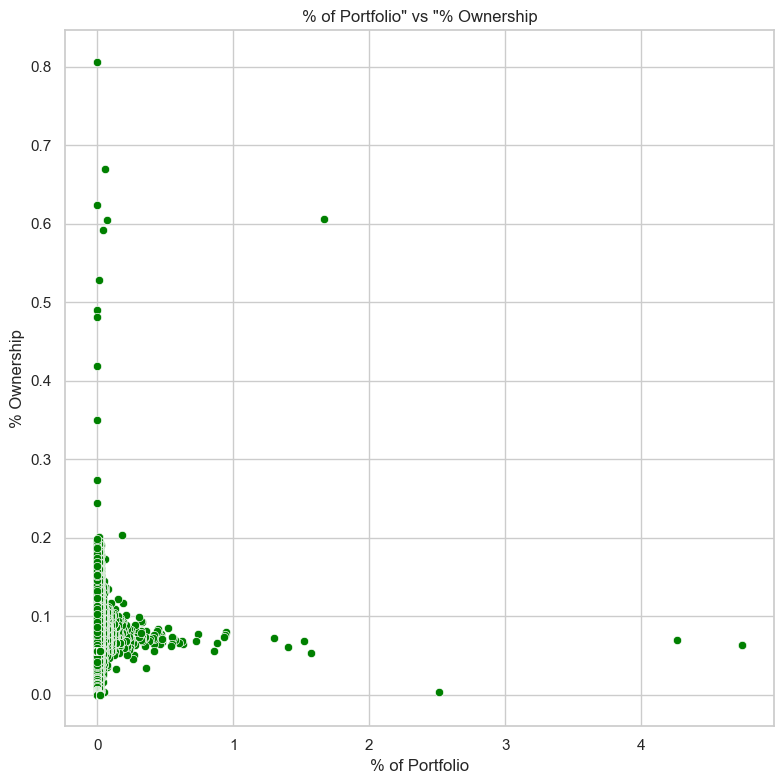

In [92]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x='% of Portfolio',y='% Ownership', marker='o', color='green')
plt.title('% of Portfolio" vs "% Ownership')
plt.xlabel("% of Portfolio")
plt.ylabel("% Ownership")
plt.tight_layout()
plt.grid('True')
plt.show()

14. Visualize stock rankings using a heatmap.

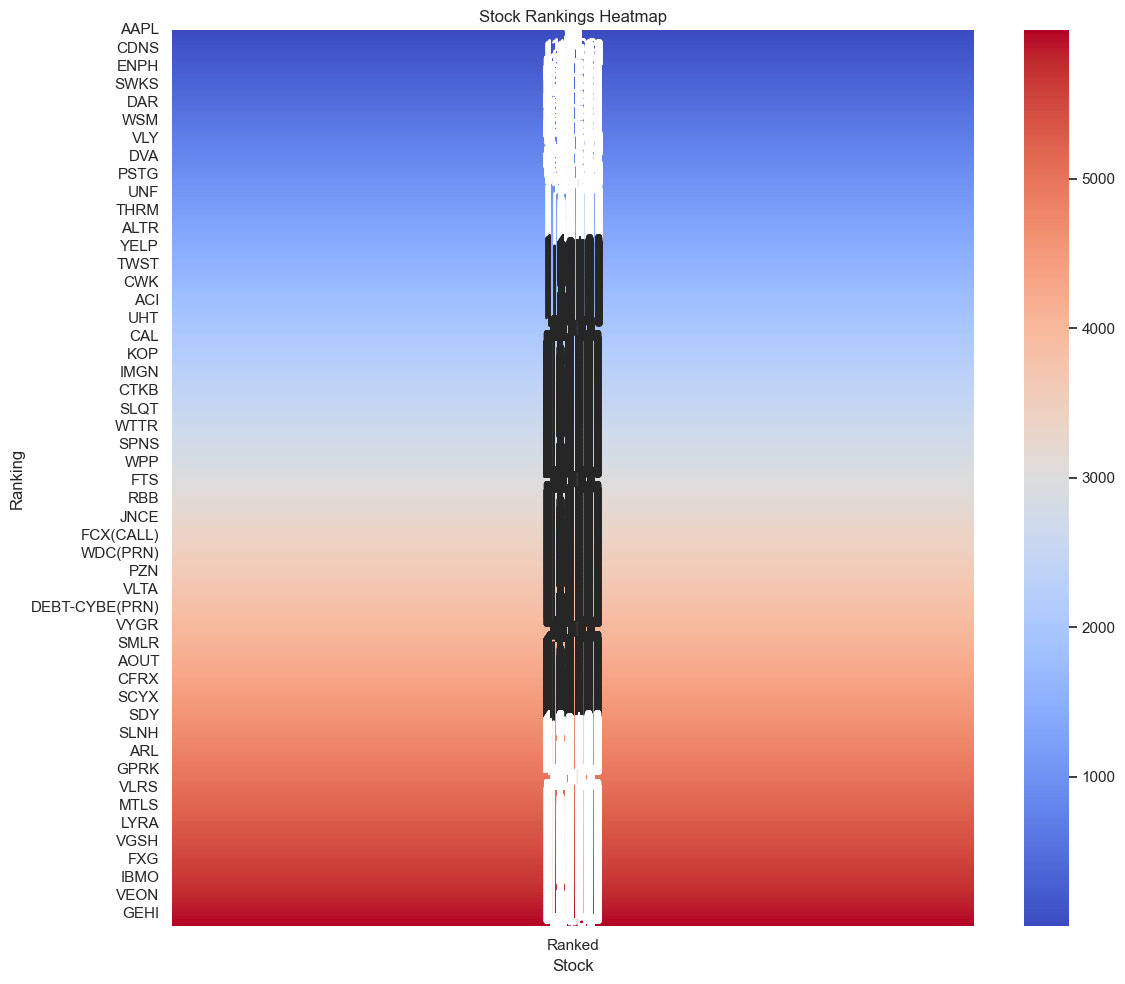

In [104]:
df_sorted = df.sort_values('Ranked') 

rank_data = df_sorted[['Stock', 'Ranked']].set_index('Stock')

plt.figure(figsize=(12, 10)) 
sns.heatmap(rank_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Stock Rankings Heatmap')
plt.xlabel('Stock')
plt.ylabel('Ranking')
plt.tight_layout()
plt.show()

15. Create a pie chart showing portfolio percentage contribution by sector

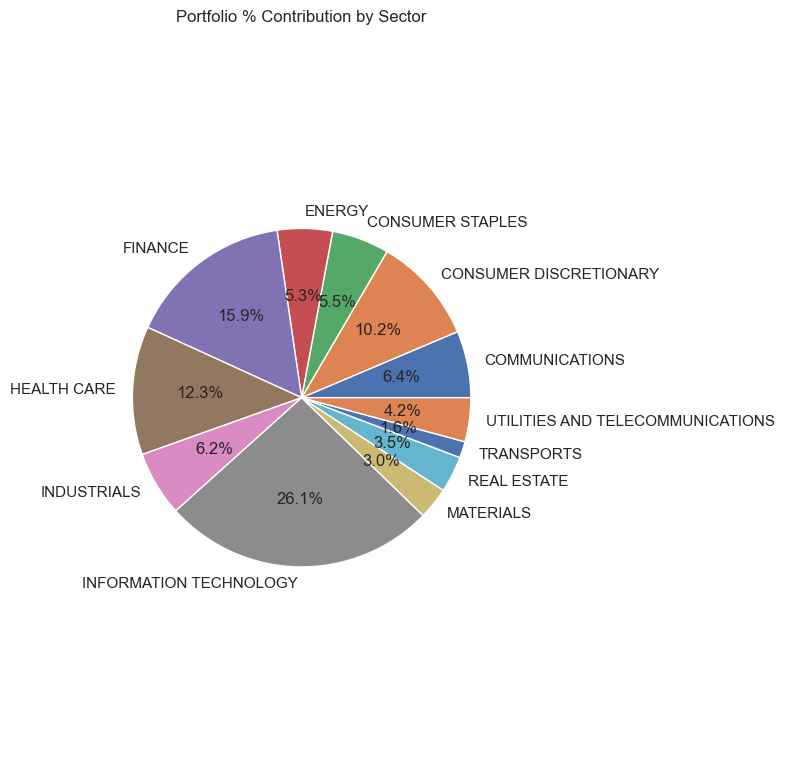

In [125]:
sector_dataa = df.groupby('Sector')['% of Portfolio'].sum()
plt.figure(figsize=(8, 8))
plt.pie(sector_dataa,labels=sector_dataa.index, autopct='%1.1f%%')
plt.title('Portfolio % Contribution by Sector')
plt.axis('equal') 
plt.tight_layout()
plt.show()


16. Identify outliers in "% Change" using box plots

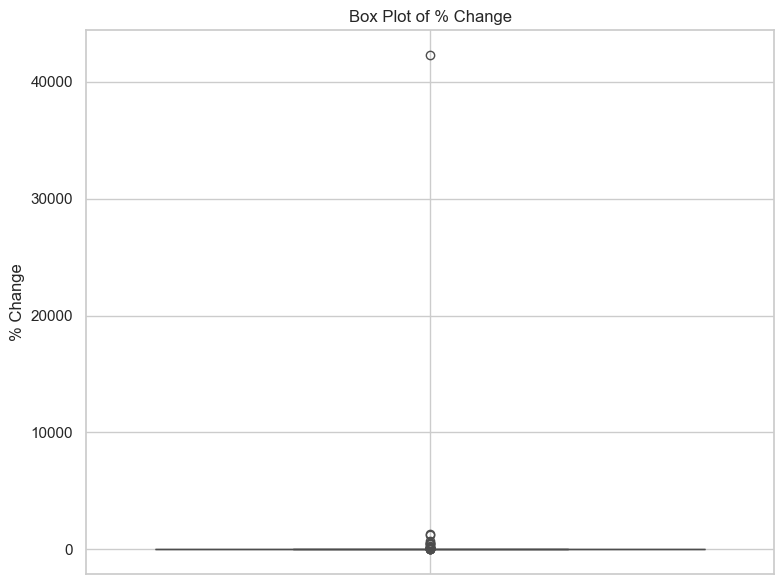

In [127]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='% Change', color='red')
plt.title('Box Plot of % Change')
plt.ylabel('% Change')
plt.grid(True)
plt.tight_layout()
plt.show()

17. Perform correlation analysis between numeric columns (e.g., Market Value, % Ownership).

Correlation between Market Value and % Ownership: 0.07795158742433582


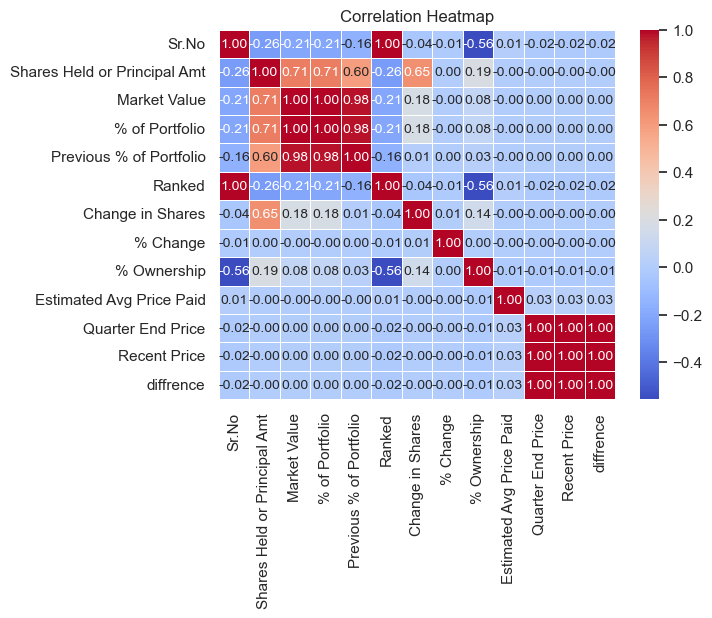

In [138]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print("Correlation between Market Value and % Ownership:", correlation_matrix.loc['Market Value', '% Ownership'])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5,fmt='.2f',annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()